In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import sklearn

In [2]:
train = pd.read_csv('Train _hack.csv')
test = pd.read_csv('Test _hack.csv')
sample = pd.read_csv('SampleSubmission _hack.csv')

In [3]:
def full_display(df):
    with pd.option_context('display.max_rows', 1000):
        with pd.option_context('display.max_columns', 1000):
            display(df)

In [4]:
full_display(train.head(20))

,Applicant_ID,form_field1,form_field2,form_field3,form_field4,form_field5,form_field6,form_field7,form_field8,form_field9,form_field10,form_field11,form_field12,form_field13,form_field14,form_field15,form_field16,form_field17,form_field18,form_field19,form_field20,form_field21,form_field22,form_field23,form_field24,form_field25,form_field26,form_field27,form_field28,form_field29,form_field30,form_field31,form_field32,form_field33,form_field34,form_field35,form_field36,form_field37,form_field38,form_field39,form_field40,form_field41,form_field42,form_field43,form_field44,form_field45,form_field46,form_field47,form_field48,form_field49,form_field50,default_status
0,Apcnt_1000000,3436.0,0.28505,1.6560,0.0000,0.0000,0.0,10689720.0,252072.0,4272776.0,11333126.0,4397256.0,2301324.0,7875694.0,96375139,112181765.0,1.0,1.0,1.0,3.0,3.0,134.655,NaN,NaN,134.655,4000.5,17064.0,11376.0,60.0,17064.0,5962.0,NaN,1052.0,8.0000,2.0,NaN,12.0,12.0,4.0,0.0,NaN,NaN,0.392854,2.02,0.711632,0.0,0.0,charge,NaN,1.129518,0.044335,no
1,Apcnt_1000004,3456.0,0.67400,0.2342,0.0000,0.0000,0.0,898979.0,497531.0,9073814.0,2533168.0,244292.0,3982971.0,2141445.0,28141427,45169902.0,1.0,1.0,1.0,2.0,2.0,109.230,11385.240,14584.290,86.685,4161.0,13413.0,8942.0,304.0,13413.0,5780.0,NaN,2554.0,17.5000,0.0,0.0,16.0,24.0,8.0,0.0,NaN,NaN,0.314281,8.08,0.183584,NaN,0.0,charge,349.805730,1.620483,0.322436,no
2,Apcnt_1000008,3276.0,0.53845,3.1510,0.0000,6.2820,NaN,956940.0,NaN,192944.0,1079864.0,NaN,NaN,0.0,16576457,22452691.0,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,1597.5,4746.0,3164.0,60.0,15696.0,NaN,14508.0,70.0,0.6666,0.0,NaN,12.0,0.0,6.0,0.0,149.6805,NaN,0.162965,18.18,0.791136,0.0,0.0,charge,NaN,1.513370,0.011640,yes
3,Apcnt_1000012,3372.0,0.17005,0.5050,0.0000,0.0000,192166.0,3044703.0,385499.0,3986472.0,3621979.0,NaN,771776.0,1186839.0,48187375,136297820.0,0.0,0.0,0.0,1.0,1.0,120.120,8580.000,0.000,85.800,1701.0,4014.0,2676.0,60.0,11679.0,NaN,NaN,522.0,7.8334,1.0,1.0,4.0,8.0,4.0,1.0,NaN,NaN,0.488884,2.02,0.685168,NaN,0.0,charge,89.940100,0.664452,0.082729,no
4,Apcnt_1000016,3370.0,0.77270,1.1010,0.0000,0.0000,1556.0,214728.0,214728.0,1284089.0,361770.0,396391.0,818456.0,511535.0,28141427,15292757.0,0.0,0.0,0.0,3.0,3.0,104.535,8360.190,10326.450,115.335,1551.0,3285.0,2190.0,60.0,19437.0,12958.0,5202.0,272.0,1.0000,0.0,0.0,24.0,2.0,24.0,0.0,150.0135,NaN,0.275000,12.12,0.438168,0.0,0.0,charge,97.887502,1.427891,0.045630,no
5,Apcnt_1000020,3724.0,NaN,0.0000,0.0000,0.0000,192944.0,9244585.0,6761209.0,67963357.0,32902009.0,NaN,976390.0,2114215.0,16576457,NaN,0.0,0.0,0.0,0.0,0.0,8.385,NaN,NaN,4.845,2590.5,22083.0,14722.0,3772.0,22083.0,NaN,NaN,3858.0,31.0000,0.0,NaN,10.0,60.0,0.0,0.0,NaN,NaN,0.030558,12.12,0.382960,NaN,0.0,lending,NaN,0.000000,NaN,no
6,Apcnt_1000024,3350.0,0.24205,0.3132,0.0000,2.8188,NaN,580388.0,NaN,96472.0,580388.0,631347.0,NaN,0.0,21973443,91602498.0,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,822.0,NaN,NaN,426.0,13413.0,NaN,13413.0,36.0,14.3334,0.0,NaN,12.0,2.0,2.0,0.0,153.8745,NaN,0.660000,1.01,0.513504,NaN,0.0,charge,NaN,2.146512,0.004390,yes
7,Apcnt_1000028,3416.0,0.87020,0.0570,0.0000,0.0000,17505.0,186331.0,186331.0,1484813.0,326760.0,50959.0,1284089.0,5633109.0,11564970,18211813.0,0.0,0.0,0.0,1.0,1.0,124.980,8267.655,7755.000,82.680,1498.5,1734.0,1156.0,548.0,15240.0,182.0,NaN,460.0,5.5000,0.0,1.0,10.0,6.0,12.0,0.0,NaN,149.0190,0.137500,3.03,0.635960,NaN,0.0,charge,155.295994,0.946074,0.128389,no
8,Apcnt_1000036,3376.0,0.29180,0.5586,0.0000,0.0000,18283.0,1105149.0,18283.0,115533.0,1557167.0,752715.0,97639.0,427511.0,11564970,NaN,0.0,0.0,0.0,1.0,2.0,126.495,NaN,NaN,126.495,1597.5,3195.0,2130.0,182.0,3741.0,1034.0,NaN,70.0,34.8334,1.0,NaN,14.0,0.0,8.0,0.0,NaN,102.2625,0.471427,4.04,0.410880,0.0,0.0,charge,NaN,0.641601,0.009990,no
9,Apcnt_1000040,3310.0,0.24395,0.1562,0.0000,0.0000,NaN,0.0,NaN,NaN,0.0,208115.0,NaN,NaN,11564970,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,502.5,1278.0,852.0,182.0,9126.0,NaN,273.0,22.0,4.1666,0.0,1.0,4.0,0.0,4.0,0.0,150.0000,NaN,0.8

In [5]:
train['default_status']=train['default_status'].map({'yes':1,'no':0})

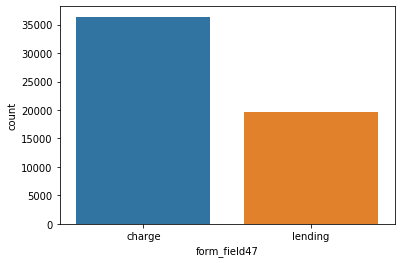

In [6]:
sns.countplot(train['form_field47'])

In [7]:
train = pd.get_dummies(columns= ['form_field47'], data = train)

In [8]:
###new features
train['func_cred*ten1'] = train['form_field32'] * train['form_field10']
train['func_cred*ten2'] = train['form_field33'] * train['form_field10']
train['field_38*22'] = train['form_field38'] * train['form_field22']

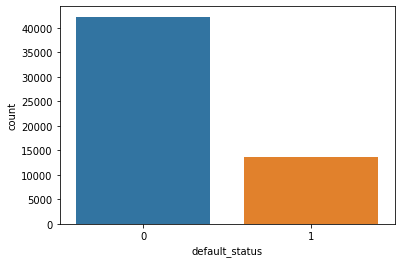

In [9]:
sns.countplot(train['default_status'])

In [10]:
for att in train.columns:
    train[att].fillna(-999,inplace=True)

In [11]:
full_display(train.corr())

,form_field1,form_field2,form_field3,form_field4,form_field5,form_field6,form_field7,form_field8,form_field9,form_field10,form_field11,form_field12,form_field13,form_field14,form_field15,form_field16,form_field17,form_field18,form_field19,form_field20,form_field21,form_field22,form_field23,form_field24,form_field25,form_field26,form_field27,form_field28,form_field29,form_field30,form_field31,form_field32,form_field33,form_field34,form_field35,form_field36,form_field37,form_field38,form_field39,form_field40,form_field41,form_field42,form_field43,form_field44,form_field45,form_field46,form_field48,form_field49,form_field50,default_status,form_field47_charge,form_field47_lending,func_cred*ten1,func_cred*ten2,field_38*22
form_field1,1.000000,0.066395,0.358717,0.359764,0.355599,0.155828,0.123642,0.230769,0.229502,0.172198,-0.089929,0.150727,0.093389,-0.021031,0.092517,0.431777,0.458290,0.460704,0.054589,0.361945,0.371567,0.108731,0.083393,0.322807,0.332689,0.302250,0.303718,0.155923,0.291305,0.171175,0.082676,0.355534,0.106149,0.360407,0.241815,0.285131,0.491966,0.364180,0.622855,0.079766,0.150026,0.413058,0.381166,0.579925,0.240394,0.281385,0.054497,0.361472,0.040527,-0.140965,-0.090533,0.090533,0.113274,0.118332,0.080540
form_field2,0.066395,1.000000,0.080174,0.080579,0.080074,-0.138547,-0.032814,-0.090430,-0.026720,-0.027382,0.012688,0.022158,-0.012013,-0.007145,-0.008544,0.055683,0.057080,0.057772,0.026108,0.081049,0.069337,0.166758,0.145292,0.054365,-0.140681,-0.088207,-0.086130,-0.113445,-0.092637,0.055030,0.041341,-0.032589,0.005889,0.079351,0.206719,0.091039,0.063798,0.097107,0.083604,0.052440,0.113881,0.070366,0.080117,0.094005,-0.021014,0.105363,-0.002065,0.080659,0.024883,0.073846,0.097002,-0.097002,-0.021155,-0.046249,0.143340
form_field3,0.358717,0.080174,1.000000,0.999254,0.993343,0.025861,0.024715,0.038259,0.041953,0.031477,0.030722,0.038149,0.016790,-0.030710,0.015772,0.136770,0.152245,0.159336,0.111975,0.999346,0.119697,0.065471,0.053084,0.107872,0.118576,0.082369,0.082392,0.045485,0.140925,0.070512,0.049570,0.118484,0.150281,0.999621,0.091056,0.417024,0.241281,0.995056,0.276831,0.046772,0.052861,0.491087,0.787299,0.241327,0.067352,0.127518,0.010087,0.999499,0.006288,0.009359,-0.006916,0.006916,0.018174,0.019662,0.047518
form_field4,0.359764,0.080579,0.999254,1.000000,0.991149,0.026420,0.025235,0.039185,0.042613,0.032431,0.025518,0.038887,0.017195,-0.030709,0.016036,0.137795,0.152967,0.159954,0.111989,0.998931,0.120604,0.065385,0.052822,0.106595,0.117680,0.081276,0.081334,0.047075,0.140412,0.073910,0.046715,0.117139,0.150386,0.999212,0.091366,0.416246,0.240333,0.994600,0.277598,0.045198,0.054992,0.490614,0.786950,0.242454,0.067842,0.133351,0.010339,0.998938,0.006456,0.009983,-0.007203,0.007203,0.018619,0.020175,0.047108
form_field5,0.355599,0.080074,0.993343,0.991149,1.000000,0.021725,0.020352,0.032050,0.034483,0.025820,0.052391,0.031910,0.013911,-0.030823,0.011432,0.121704,0.135747,0.142585,0.110062,0.991007,0.106645,0.061349,0.049722,0.094787,0.108797,0.072006,0.071907,0.037931,0.134865,0.064811,0.075906,0.106186,0.147800,0.991395,0.082693,0.416548,0.229409,0.986949,0.268839,0.062885,0.048353,0.488447,0.780580,0.232281,0.056543,0.121485,0.008272,0.992554,0.005129,0.015713,-0.003183,0.003183,0.014595,0.015926,0.044224
form_field6,0.155828,-0.138547,0.025861,0.026420,0.021725,1.000000,0.207660,0.522087,0.289385,0.258334,-0.071671,0.003930,0.183866,-0.000700,0.132512,0.204917,0.185440,0.177611,-0.033103,0.025788,0.104013,-0.178472,-0.162650,0.069625,0.318613,0.255407,0.255463,0.320936,0.237581,0.017363,-0.052720,0.199499,0.031733,0.028987,-0.067531,-0.042113,0.125746,0.013946,0.106078,-0.098012,-0.039541,0.018392,0.009114,0.092688,0.179975,-0.005218,0.030454,0.025554,0.067747,-0.173197,-0.139724,0.139724,0.147355,0.204134,-0.162128
form_field7,0.123642,-0.032814,0.024715,0.025235,0.020352,0.207660,1.000000,0.357153,0.293446,0.900846,-0.050529,0.145371,0.296013,0.000341,0.172566,0.132331,0.127726,0.127623,-0.005317,0

In [12]:
full_display(train.describe())

,form_field1,form_field2,form_field3,form_field4,form_field5,form_field6,form_field7,form_field8,form_field9,form_field10,form_field11,form_field12,form_field13,form_field14,form_field15,form_field16,form_field17,form_field18,form_field19,form_field20,form_field21,form_field22,form_field23,form_field24,form_field25,form_field26,form_field27,form_field28,form_field29,form_field30,form_field31,form_field32,form_field33,form_field34,form_field35,form_field36,form_field37,form_field38,form_field39,form_field40,form_field41,form_field42,form_field43,form_field44,form_field45,form_field46,form_field48,form_field49,form_field50,default_status,form_field47_charge,form_field47_lending,func_cred*ten1,func_cred*ten2,field_38*22
count,56000.000000,56000.000000,56000.000000,56000.000000,56000.000000,5.600000e+04,5.600000e+04,5.600000e+04,5.600000e+04,5.600000e+04,5.600000e+04,5.600000e+04,5.600000e+04,5.600000e+04,5.600000e+04,56000.000000,56000.000000,56000.000000,56000.000000,56000.000000,56000.000000,56000.000000,56000.000000,56000.000000,56000.000000,56000.000000,56000.000000,56000.000000,56000.000000,56000.000000,56000.000000,56000.000000,56000.000000,56000.000000,56000.000000,56000.000000,56000.000000,56000.000000,56000.000000,56000.000000,56000.000000,56000.000000,56000.000000,56000.000000,56000.000000,56000.000000,5.600000e+04,56000.000000,5.600000e+04,56000.000000,56000.000000,56000.000000,5.600000e+04,5.600000e+04,5.600000e+04
mean,3288.988125,-68.061282,-5.287392,-5.486368,-4.389031,4.752342e+05,6.232170e+06,1.999799e+06,1.127799e+07,1.178069e+07,9.012758e+05,2.281290e+06,5.377829e+06,6.914875e+07,6.854873e+07,-232.376143,-198.713089,-185.342911,0.877375,-5.307893,-220.812531,3849.793985,2710.570025,-157.477512,2271.906295,8631.499232,4996.671982,17158.475375,16407.492000,2383.457375,2513.931054,749.800107,-8.791913,-6.104161,-412.826536,-23.188411,-89.569000,2.213946,-75.037214,-747.707893,-647.668167,-23.241859,-3.565496,-95.519653,-558.640946,-283.647714,1.910105e+05,-5.290536,4.818161e+05,0.244911,0.649518,0.350482,2.128049e+10,2.535486e+08,4.617669e+04
std,950.560828,252.735737,79.400587,79.418227,80.131613,1.278889e+06,1.833216e+07,3.605357e+06,1.888158e+07,2.662648e+07,3.410960e+06,4.257190e+06,2.217339e+07,2.713995e+09,1.054537e+08,422.285716,399.053095,388.625626,8.627427,79.390025,491.120212,5817.699466,5503.049115,604.910786,2153.183593,9016.988065,5603.041057,26884.391711,9735.285958,3858.394906,6336.743816,1146.612131,150.740001,79.309402,492.046373,187.842975,298.746289,80.364466,263.470948,474.850472,515.718136,151.783727,100.964839,294.636580,496.023149,450.532984,1.313103e+06,79.391884,5.239461e+06,0.430038,0.477125,0.477125,8.183705e+10,9.063954e+08,8.006892e+04
min,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-9.990000e+02,-9.990000e+02,-9.990000e+02,-9.990000e+02,-9.990000e+02,-9.990000e+02,-9.990000e+02,-9.990000e+02,0.000000e+00,-9.990000e+02,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-9.990000e+02,-999.000000,-9.990000e+02,0.000000,0.000000,0.000000,-9.990000e+02,-9.990000e+02,-9.990000e+02
25%,3336.000000,0.047700,0.000000,0.000000,0.000000,0.000000e+00,3.248150e+05,0.000000e+00,4.217732e+05,4.170080e+05,-9.990000e+02,1.205900e+04,0.000000e+00,1.657646e+07,-9.990000e+02,0.000000,0.000000,0.000000,0.000000,0.000000,-999.000000,-999.000000,-999.000000,0.000000,889.500000,1734.000000,730.000000,60.000000,9672.000000,-999.000000,-999.000000,112.000000,2.166600,0.000000,-999.000000,6.000000,0.000000,4.000000,0.000000,-999.000000,-999.000000,0.000000,2.020000,0.349148,-999.000000,-999.000000,-9.990000e+02,0.000000,7.502524e-03,0.000000,0.000000,0.000000,3.125693e+07,8.17120

In [13]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56000 entries, 0 to 55999
Data columns (total 56 columns):
Applicant_ID            56000 non-null object
form_field1             56000 non-null float64
form_field2             56000 non-null float64
form_field3             56000 non-null float64
form_field4             56000 non-null float64
form_field5             56000 non-null float64
form_field6             56000 non-null float64
form_field7             56000 non-null float64
form_field8             56000 non-null float64
form_field9             56000 non-null float64
form_field10            56000 non-null float64
form_field11            56000 non-null float64
form_field12            56000 non-null float64
form_field13            56000 non-null float64
form_field14            56000 non-null int64
form_field15            56000 non-null float64
form_field16            56000 non-null float64
form_field17            56000 non-null float64
form_field18            56000 non-null float64
f

##### Test Set

In [14]:
test = pd.get_dummies(columns= ['form_field47'], data = test)

In [15]:
test['func_cred*ten1'] = test['form_field32'] * test['form_field10']
test['func_cred*ten2'] = test['form_field33'] * test['form_field10']
test['field_38*22'] = test['form_field38'] * test['form_field22']

In [16]:
for att in test.columns:
    test[att].fillna(-999,inplace=True)

In [17]:
full_display(test.head(20))

,Applicant_ID,form_field1,form_field2,form_field3,form_field4,form_field5,form_field6,form_field7,form_field8,form_field9,form_field10,form_field11,form_field12,form_field13,form_field14,form_field15,form_field16,form_field17,form_field18,form_field19,form_field20,form_field21,form_field22,form_field23,form_field24,form_field25,form_field26,form_field27,form_field28,form_field29,form_field30,form_field31,form_field32,form_field33,form_field34,form_field35,form_field36,form_field37,form_field38,form_field39,form_field40,form_field41,form_field42,form_field43,form_field44,form_field45,form_field46,form_field48,form_field49,form_field50,form_field47_charge,form_field47_lending,func_cred*ten1,func_cred*ten2,field_38*22
0,Apcnt_1000032,3236.0,0.34875,10.2006,0.0000,0.0000,418564.0,418564.0,418564.0,540710.0,0.0,1649749.0,5446.0,0.0,48187375,114686147.0,0.0,0.0,0.0,0.0,0.0,-999.000,-999.000,-999.000,-999.000,1086.0,6204.0,2676.0,60.0,14691.0,9794.0,-999.0,238.0,1.8334,0.0,-999.0,22.0,2.0,14.0,0.0,-999.0000,-999.0000,0.825000,1.01,0.800000,-999.0,0.0,-999.000000,0.000000,0.011221,1,0,0.000000e+00,0.000000e+00,-999.00
1,Apcnt_1000048,3284.0,1.27360,2.9606,9.0198,0.0000,0.0,9858816.0,49014.0,1510098.0,18308285.0,622789.0,1025793.0,1396510.0,34694910,87479487.0,1.0,1.0,1.0,2.0,2.0,142.560,-999.000,-999.000,570.585,3082.5,10221.0,6814.0,60.0,11955.0,3528.0,-999.0,1216.0,19.5000,3.0,-999.0,30.0,18.0,14.0,2.0,-999.0000,18.8415,0.507694,4.04,0.623248,1.0,0.0,-999.000000,0.504974,0.043525,0,1,2.226287e+10,3.570116e+08,-999.00
2,Apcnt_1000052,-999.0,0.27505,0.0600,0.0000,0.0000,-999.0,-999.0,-999.0,-999.0,0.0,118256.0,-999.0,-999.0,21973443,-999.0,-999.0,-999.0,-999.0,0.0,0.0,-999.000,-999.000,-999.000,-999.000,-999.0,-999.0,-999.0,852.0,4836.0,-999.0,-999.0,-999.0,7.8334,0.0,-999.0,2.0,-999.0,0.0,-999.0,-999.0000,-999.0000,-999.000000,0.00,-999.000000,-999.0,-999.0,-999.000000,0.000000,-999.000000,1,0,-9.990000e+02,0.000000e+00,-999.00
3,Apcnt_1000076,3232.0,0.28505,2.8032,0.0000,0.0000,0.0,473802.0,473802.0,1724437.0,493641.0,1391064.0,1176725.0,1220293.0,16576457,-999.0,2.0,2.0,2.0,3.0,3.0,109.005,13050.000,-999.000,109.005,1414.5,4197.0,2798.0,60.0,14964.0,-999.0,-999.0,248.0,9.0000,1.0,1.0,36.0,0.0,26.0,0.0,-999.0000,-999.0000,0.916663,2.02,0.464224,-999.0,-999.0,90.163742,0.788809,0.104029,1,0,1.224230e+08,4.442769e+06,339300.00
4,Apcnt_1000080,3466.0,2.09545,0.8318,2.5182,0.0000,19839.0,1150662.0,1150662.0,7860523.0,5752921.0,271133.0,613064.0,4779643.0,48187375,72049802.0,0.0,0.0,0.0,3.0,3.0,139.065,469.290,469.290,15.180,2724.0,9855.0,6570.0,182.0,11679.0,5900.0,-999.0,2388.0,16.6666,1.0,0.0,24.0,28.0,20.0,0.0,-999.0000,-999.0000,0.234047,23.23,0.726688,0.0,0.0,1303.587148,1.637733,0.163124,0,1,1.373798e+10,9.588163e+07,9385.80
5,Apcnt_1000084,-999.0,0.41005,-999.0000,-999.0000,-999.0000,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,34694910,-999.0,-999.0,-999.0,-999.0,0.0,-999.0,-999.000,-999.000,-999.000,-999.000,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,1.8334,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0000,-999.0000,-999.000000,-999.00,-999.000000,-999.0,-999.0,-999.000000,-999.000000,-999.000000,1,0,-9.990000e+02,-9.990000e+02,-999.00
6,Apcnt_1000104,3408.0,0.74605,0.6064,0.0000,0.0000,0.0,3769410.0,12059.0,1230018.0,4563748.0,56016.0,574942.0,850354.0,16576457,-999.0,1.0,1.0,1.0,2.0,2.0,146.850,2599.995,2599.995,91.080,2524.5,6570.0,4380.0,182.0,8670.0,-999.0,3558.0,332.0,11.0000,0.0,-999.0,22.0,2.0,10.0,0.0,144.3960,-999.0000,0.061116,12.12,0.642296,0.0,0.0,221.047330,1.245020,0.074203,1,0,1.515164e+09,5.020123e+07,25999.95
7,Apcnt_1000116,3296.0,0.41745,0.9796,0.0000,0.0000,-999.0,56794.0,-999.0,-999.0,56794.0,252461.0,-999.0,0.0,11564970,35465908.0,-999.0,-999.0,-999.0,0.0,0.0,-999.000,-999.000,-999.000,-999.000,319.5,-999.0,-999.0,60.0,5658.0,-999.0,4836.0,14.0,8.6666,0.0,0.0,10.0,0.0,8.0,0.0,148.0380,-999.0000,1.100000,1.01,0.532248,-999.0,-999.0,-999.000000,0.000000,-999.000000,1,0,7.951160e+05

In [18]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24000 entries, 0 to 23999
Data columns (total 55 columns):
Applicant_ID            24000 non-null object
form_field1             24000 non-null float64
form_field2             24000 non-null float64
form_field3             24000 non-null float64
form_field4             24000 non-null float64
form_field5             24000 non-null float64
form_field6             24000 non-null float64
form_field7             24000 non-null float64
form_field8             24000 non-null float64
form_field9             24000 non-null float64
form_field10            24000 non-null float64
form_field11            24000 non-null float64
form_field12            24000 non-null float64
form_field13            24000 non-null float64
form_field14            24000 non-null int64
form_field15            24000 non-null float64
form_field16            24000 non-null float64
form_field17            24000 non-null float64
form_field18            24000 non-null float64
f

In [19]:
full_display(test.describe())

,form_field1,form_field2,form_field3,form_field4,form_field5,form_field6,form_field7,form_field8,form_field9,form_field10,form_field11,form_field12,form_field13,form_field14,form_field15,form_field16,form_field17,form_field18,form_field19,form_field20,form_field21,form_field22,form_field23,form_field24,form_field25,form_field26,form_field27,form_field28,form_field29,form_field30,form_field31,form_field32,form_field33,form_field34,form_field35,form_field36,form_field37,form_field38,form_field39,form_field40,form_field41,form_field42,form_field43,form_field44,form_field45,form_field46,form_field48,form_field49,form_field50,form_field47_charge,form_field47_lending,func_cred*ten1,func_cred*ten2,field_38*22
count,24000.000000,24000.000000,24000.000000,24000.000000,24000.000000,2.400000e+04,2.400000e+04,2.400000e+04,2.400000e+04,2.400000e+04,2.400000e+04,2.400000e+04,2.400000e+04,2.400000e+04,2.400000e+04,24000.000000,24000.000000,24000.000000,24000.000000,24000.000000,24000.000000,24000.000000,24000.000000,24000.000000,24000.000000,24000.000000,24000.000000,24000.000000,24000.000000,24000.000000,24000.000000,24000.000000,24000.000000,24000.000000,24000.000000,24000.000000,24000.000000,24000.000000,24000.000000,24000.000000,24000.000000,24000.000000,24000.000000,24000.000000,24000.00000,24000.000000,2.400000e+04,24000.000000,2.400000e+04,24000.000000,24000.000000,2.400000e+04,2.400000e+04,2.400000e+04
mean,3284.562500,-70.619160,-5.018289,-5.223330,-3.906996,4.798285e+05,6.165099e+06,2.034167e+06,1.159245e+07,1.180204e+07,9.413869e+05,2.288728e+06,5.369789e+06,9.291862e+07,6.852662e+07,-227.674417,-195.214083,-181.636750,0.938458,-5.104667,-216.409551,3871.618602,2698.096268,-152.113841,2285.574375,8641.114500,5026.581167,17600.919625,16400.684250,2408.873333,2575.932750,763.815000,-6.748113,-5.890542,-410.557958,-25.290958,-86.155583,2.335208,-76.048292,-751.902683,-646.030791,-23.698469,-3.894317,-97.807756,-563.49025,-286.518292,1.890736e+05,-5.019605,5.398722e+05,0.644458,0.355542,2.196669e+10,2.569759e+08,4.610274e+04
std,961.477817,257.065359,77.795717,77.822785,78.679254,1.303373e+06,1.561130e+07,3.651210e+06,2.172455e+07,2.471253e+07,3.955221e+06,4.481527e+06,1.853921e+07,3.768364e+09,1.080974e+08,419.284416,396.399303,385.606692,1.705298,78.045220,489.471415,5851.157416,5599.571222,628.542447,2133.844011,9009.324623,5600.974984,27109.523765,9738.897737,3879.256786,6424.989579,1156.087887,144.812905,77.966733,491.644198,192.805417,294.177580,78.996623,265.095719,471.899289,516.389100,153.215052,102.293846,297.754248,495.42379,451.904215,1.488255e+06,77.785825,5.875015e+06,0.478687,0.478687,7.324362e+10,7.908759e+08,8.032199e+04
min,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-9.990000e+02,-9.990000e+02,-9.990000e+02,-9.990000e+02,-9.990000e+02,-9.990000e+02,-9.990000e+02,-9.990000e+02,0.000000e+00,-9.990000e+02,-999.000000,-999.000000,-999.000000,0.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.00000,-999.000000,-9.990000e+02,-999.000000,-9.990000e+02,0.000000,0.000000,-9.990000e+02,-9.990000e+02,-9.990000e+02
25%,3332.000000,0.046350,0.000000,0.000000,0.000000,0.000000e+00,3.084770e+05,0.000000e+00,4.240100e+05,3.951268e+05,-9.990000e+02,1.818575e+04,0.000000e+00,1.657646e+07,-9.990000e+02,0.000000,0.000000,0.000000,0.000000,0.000000,-999.000000,-999.000000,-999.000000,0.000000,912.000000,1734.000000,790.000000,60.000000,9672.000000,-999.000000,-999.000000,112.000000,2.166600,0.000000,-999.000000,6.000000,0.000000,4.000000,0.000000,-999.000000,-999.000000,0.000000,2.020000,0.350744,-999.00000,-999.000000,-9.990000e+02,0.000000,6.969820e-03,0.000000,0.000000,3.121686e+07,8.354153e+05,-9.990000e+02
50%,3472.000000,0.228800,0.055900,0.000000,0.000000,

#### Building models

In [20]:
from sklearn.model_selection import train_test_split,StratifiedKFold, GridSearchCV
from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from catboost import CatBoostClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

In [21]:
k=list(train.columns)
k.remove('default_status')
k.remove('Applicant_ID')
target = 'default_status'

In [22]:
def eval_metric(y, pred):
    return roc_auc_score(y, pred)

ku = 10
kf = StratifiedKFold(ku)

#### Catboost

In [23]:
cat_params = {
    'n_estimators': 4500,
    'learning_rate': 0.01,
    'objective': 'CrossEntropy',
    'max_depth':9,
    'eval_metric': 'AUC',
    #'rsm': 0.7,
    'random_seed': 42,
    'early_stopping_rounds': 200,
    'use_best_model': True
}

In [24]:
Average_score = 0
test_pred = []

for i, (train_index, validation_index) in enumerate(kf.split(train, train[target])):
    xtrain, ytrain = train.loc[train_index, k], train.loc[train_index, target]
    xvalid, yvalid = train.loc[validation_index, k], train.loc[validation_index, target]
    
    
    #training and validation
    model = CatBoostClassifier(**cat_params)
    model.fit(xtrain, ytrain, eval_set=[(xvalid,yvalid)], verbose=100)
    pred = model.predict_proba(xvalid)[:, -1]
    
    
    #predicting on test set
    predictions = model.predict_proba(test[k])[:, -1]
    score = eval_metric(yvalid, pred)
    
    
    Average_score += score/ku
    test_pred.append(predictions)
    print('Fold {} : {}'.format(i, score))

print()
print()
print('Avg score : ', Average_score)

0:	test: 0.7906345	best: 0.7906345 (0)	total: 293ms	remaining: 21m 57s
100:	test: 0.8211212	best: 0.8211212 (100)	total: 12s	remaining: 8m 44s
200:	test: 0.8241402	best: 0.8241402 (200)	total: 23.7s	remaining: 8m 26s
300:	test: 0.8258603	best: 0.8258746 (299)	total: 34.2s	remaining: 7m 57s
400:	test: 0.8271769	best: 0.8271769 (400)	total: 45.5s	remaining: 7m 45s
500:	test: 0.8282911	best: 0.8282911 (500)	total: 57.5s	remaining: 7m 39s
600:	test: 0.8289388	best: 0.8289388 (600)	total: 1m 9s	remaining: 7m 30s
700:	test: 0.8297611	best: 0.8297611 (700)	total: 1m 21s	remaining: 7m 19s
800:	test: 0.8304317	best: 0.8304317 (800)	total: 1m 33s	remaining: 7m 12s
900:	test: 0.8309379	best: 0.8309483 (888)	total: 1m 45s	remaining: 7m 2s
1000:	test: 0.8312805	best: 0.8312951 (997)	total: 1m 57s	remaining: 6m 50s
1100:	test: 0.8316721	best: 0.8316721 (1100)	total: 2m 9s	remaining: 6m 39s
1200:	test: 0.8319095	best: 0.8319095 (1200)	total: 2m 21s	remaining: 6m 27s
1300:	test: 0.8321649	best: 0.8321

500:	test: 0.8399451	best: 0.8399451 (500)	total: 59.7s	remaining: 7m 56s
600:	test: 0.8408732	best: 0.8408884 (598)	total: 1m 10s	remaining: 7m 39s
700:	test: 0.8413978	best: 0.8413978 (700)	total: 1m 22s	remaining: 7m 27s
800:	test: 0.8419648	best: 0.8419648 (800)	total: 1m 35s	remaining: 7m 22s
900:	test: 0.8424036	best: 0.8424089 (899)	total: 1m 48s	remaining: 7m 14s
1000:	test: 0.8426044	best: 0.8426458 (993)	total: 2m	remaining: 7m 1s
1100:	test: 0.8429255	best: 0.8429449 (1088)	total: 2m 11s	remaining: 6m 46s
1200:	test: 0.8432177	best: 0.8432177 (1200)	total: 2m 23s	remaining: 6m 34s
1300:	test: 0.8433850	best: 0.8434510 (1293)	total: 2m 35s	remaining: 6m 23s
1400:	test: 0.8436430	best: 0.8436430 (1400)	total: 2m 46s	remaining: 6m 9s
1500:	test: 0.8436949	best: 0.8437247 (1427)	total: 2m 58s	remaining: 5m 57s
1600:	test: 0.8436965	best: 0.8438087 (1522)	total: 3m 10s	remaining: 5m 45s
1700:	test: 0.8435655	best: 0.8438087 (1522)	total: 3m 22s	remaining: 5m 33s
Stopped by overfi

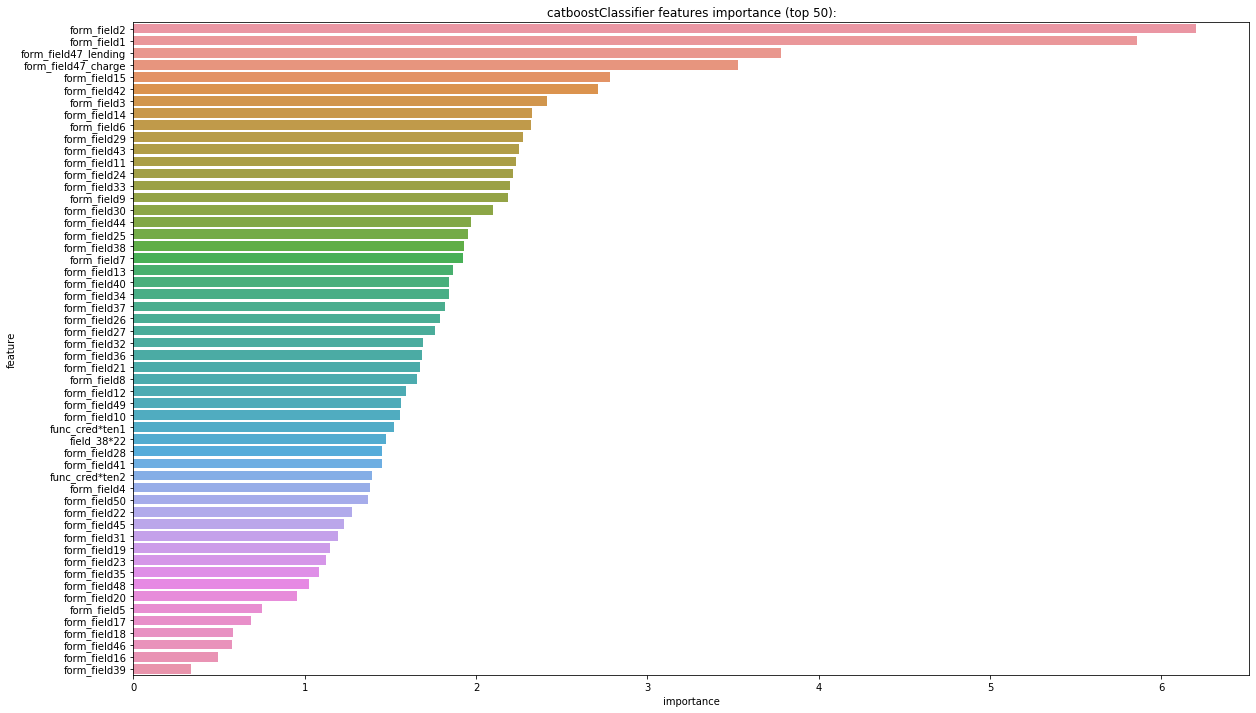

In [25]:
feature_importance_df = pd.DataFrame(model.feature_importances_, columns=['importance'])
feature_importance_df['feature'] = train[k].columns

plt.figure(figsize=(20, 12));
sns.barplot(x="importance", y="feature", data=feature_importance_df.sort_values(by = ['importance'], ascending = False).head(60))
plt.title('catboostClassifier features importance (top 50):');

In [26]:
cat_pred = np.mean(test_pred, axis=0)

#### Xgboost

In [27]:
xg_params = {
    'n_estimators': 3500,
    'learning_rate': 0.01,
    'objective': 'binary:logistic',
    'max_depth':7,
    'eval_metric': 'auc',
    #'rsm': 0.7,
    'random_state': 42,
    'min_child_weight':2,
    'use_best_model': True
}

In [28]:
Average_score = 0
test_pred = []

for i, (train_index, validation_index) in enumerate(kf.split(train, train[target])):
    xtrain, ytrain = train.loc[train_index, k], train.loc[train_index, target]
    xvalid, yvalid = train.loc[validation_index, k], train.loc[validation_index, target]
    
    
    #training and validation
    model = XGBClassifier(**xg_params,n_jobs=-1)
    model.fit(xtrain, ytrain, eval_set=[(xvalid,yvalid)],early_stopping_rounds=300 ,verbose=100)
    pred = model.predict_proba(xvalid)[:, -1]
    
    #predicting on test set
    predictions = model.predict_proba(test[k])[:, -1]
    score = eval_metric(yvalid, pred)
    
    
    Average_score += score/ku
    test_pred.append(predictions)
    print('Fold {} : {}'.format(i, score))

print()
print()
print('Avg score : ', Average_score)

[0]	validation_0-auc:0.799423
Will train until validation_0-auc hasn't improved in 300 rounds.
[100]	validation_0-auc:0.81939
[200]	validation_0-auc:0.824578
[300]	validation_0-auc:0.826525
[400]	validation_0-auc:0.827231
[500]	validation_0-auc:0.828075
[600]	validation_0-auc:0.828601
[700]	validation_0-auc:0.829088
[800]	validation_0-auc:0.82965
[900]	validation_0-auc:0.829799
[1000]	validation_0-auc:0.829883
[1100]	validation_0-auc:0.829885
[1200]	validation_0-auc:0.829761
[1300]	validation_0-auc:0.829636
Stopping. Best iteration:
[1072]	validation_0-auc:0.829924

Fold 0 : 0.8299242888747574
[0]	validation_0-auc:0.812402
Will train until validation_0-auc hasn't improved in 300 rounds.
[100]	validation_0-auc:0.8332
[200]	validation_0-auc:0.837631
[300]	validation_0-auc:0.840371
[400]	validation_0-auc:0.841555
[500]	validation_0-auc:0.842762
[600]	validation_0-auc:0.843334
[700]	validation_0-auc:0.843898
[800]	validation_0-auc:0.844
[900]	validation_0-auc:0.844115
[1000]	validation_0-a

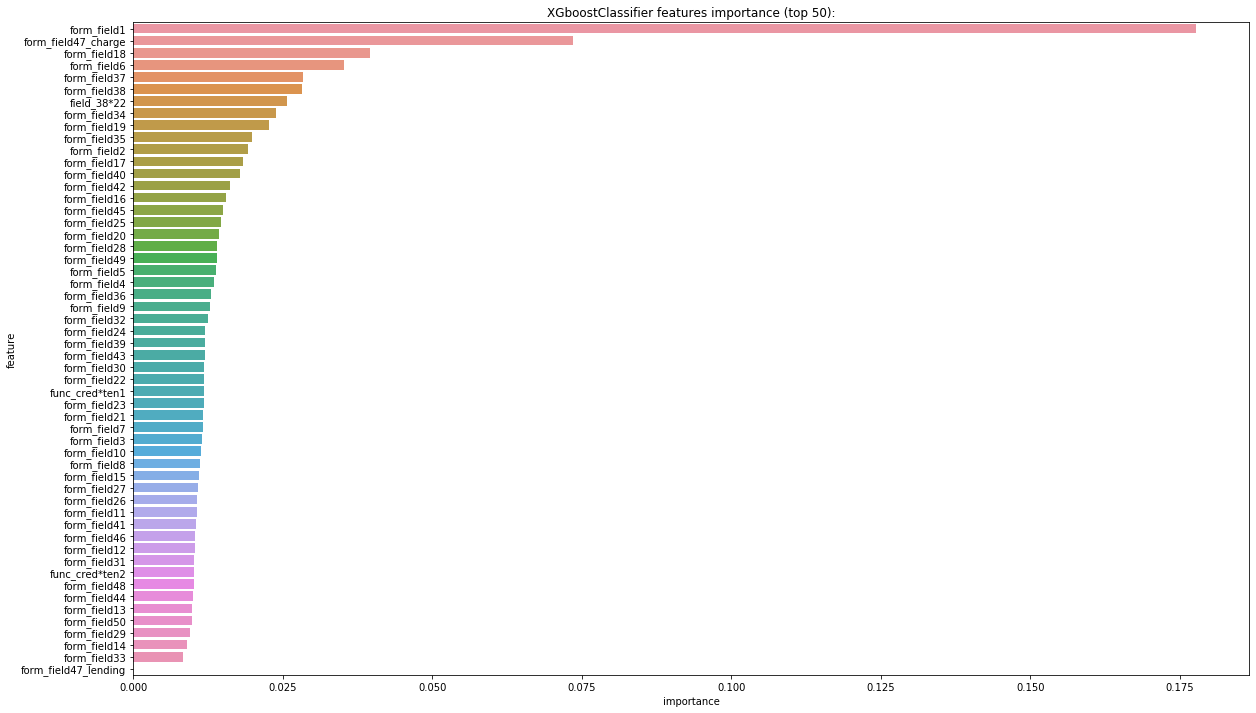

In [29]:
feature_importance_df = pd.DataFrame(model.feature_importances_, columns=['importance'])
feature_importance_df['feature'] = train[k].columns

plt.figure(figsize=(20, 12));
sns.barplot(x="importance", y="feature", data=feature_importance_df.sort_values(by = ['importance'], ascending = False).head(60))
plt.title('XGboostClassifier features importance (top 50):');

In [30]:
xg_pred = np.mean(test_pred, axis=0)

#### Blending of predictions

In [31]:
blend_pred = cat_pred*0.85 + xg_pred*0.15
sample[target] = blend_pred

In [32]:
sample.head()

,Applicant_ID,default_status
0,Apcnt_1000032,0.301782
1,Apcnt_1000048,0.387325
2,Apcnt_1000052,0.379775
3,Apcnt_1000076,0.751924
4,Apcnt_1000080,0.147453


In [33]:
sample.to_csv('blend.csv',index=False)